In [1]:
import opendatasets as od
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import pandas as pd
import numpy as np
%matplotlib inline

In [68]:
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.dpi'] = (120)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Skipping, found downloaded files in "./rossmann-store-sales" (use force=True to force download)


In [4]:
ross_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory=False)
store_df = pd.read_csv('./rossmann-store-sales/store.csv')
test_df = pd.read_csv('./rossmann-store-sales/test.csv')
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [5]:
ross_df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0              1  
2                  0              1  
3                  0              1  
4                  0              1  
...              ...            ...  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1  

[1017209 rows x 9 columns]

In [6]:
store_df

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
...                         ...                       ...     ...   
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                 NaN              NaN               NaN  
1                13.0           2010.0   Jan,Apr,Jul,Oct  
2                14.0           2011.0   Jan,Apr,Jul,Oct  
3                 NaN              NaN               NaN  
4                 NaN              NaN               NaN  
...               ...              ...               ...  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[1115 rows x 10 columns]

In [7]:
test_df

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17   1.0      1            0   
1          2      3          4  2015-09-17   1.0      1            0   
2          3      7          4  2015-09-17   1.0      1            0   
3          4      8          4  2015-09-17   1.0      1            0   
4          5      9          4  2015-09-17   1.0      1            0   
...      ...    ...        ...         ...   ...    ...          ...   
41083  41084   1111          6  2015-08-01   1.0      0            0   
41084  41085   1112          6  2015-08-01   1.0      0            0   
41085  41086   1113          6  2015-08-01   1.0      0            0   
41086  41087   1114          6  2015-08-01   1.0      0            0   
41087  41088   1115          6  2015-08-01   1.0      0            0   

       SchoolHoliday  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
41083              0  
41084              0  
41085              0  
41086              0  
41087              1  

[41088 rows x 8 columns]

In [8]:
submission_df

Id  Sales
0          1      0
1          2      0
2          3      0
3          4      0
4          5      0
...      ...    ...
41083  41084      0
41084  41085      0
41085  41086      0
41086  41087      0
41087  41088      0

[41088 rows x 2 columns]

# Preprocessing and Feature Engineering

In [9]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
...              ...            ...       ...        ...                  ...   
1017204            a              1         a          a               1900.0   
1017205            a              1         c          c               1880.0   
1017206            a              1         a          c               9260.0   
1017207            a              1         a          c                870.0   
1017208            a              1         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                             11.0                    2007.0       1   
2                             12.0                    2006.0       1   
3                              9.0                    2009.0       0   
4                              4.0                    2015.0       0   
...                            ...                       ...     ...   
1017204                        6.0                    2014.0       1   
1017205                        4.0                    2006.0       0   
1017206                        NaN                       NaN       0   
1017207                        NaN                       NaN       0   
1017208                        NaN                       NaN       1   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                    NaN              NaN               NaN  
1                   13.0           2010.0   Jan,Apr,Jul,Oct  
2                   14.0           2011.0   Jan,Apr,Jul,Oct  
3                    NaN              NaN               NaN  
4                    NaN              NaN               NaN  
...                  ...              ...               ...  
1017204             31.0           2013.0   Jan,Apr,Jul,Oct  
1017205              NaN              NaN               NaN  
1017206              NaN              NaN               NaN  
1017207              NaN              NaN               NaN  
1017208             22.0           2012.0  Mar,Jun,Sept,Dec  

[1017209 rows x 18 columns]

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [11]:
merged_test_df = test_df.merge(store_df, how='left', on='Store')
merged_test_df

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17   1.0      1            0   
1          2      3          4  2015-09-17   1.0      1            0   
2          3      7          4  2015-09-17   1.0      1            0   
3          4      8          4  2015-09-17   1.0      1            0   
4          5      9          4  2015-09-17   1.0      1            0   
...      ...    ...        ...         ...   ...    ...          ...   
41083  41084   1111          6  2015-08-01   1.0      0            0   
41084  41085   1112          6  2015-08-01   1.0      0            0   
41085  41086   1113          6  2015-08-01   1.0      0            0   
41086  41087   1114          6  2015-08-01   1.0      0            0   
41087  41088   1115          6  2015-08-01   1.0      0            0   

       SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0         c          a               1270.0   
1                  0         a          a              14130.0   
2                  0         a          c              24000.0   
3                  0         a          a               7520.0   
4                  0         a          c               2030.0   
...              ...       ...        ...                  ...   
41083              0         a          a               1900.0   
41084              0         c          c               1880.0   
41085              0         a          c               9260.0   
41086              0         a          c                870.0   
41087              1         d          c               5350.0   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                            9.0                    2008.0       0   
1                           12.0                    2006.0       1   
2                            4.0                    2013.0       0   
3                           10.0                    2014.0       0   
4                            8.0                    2000.0       0   
...                          ...                       ...     ...   
41083                        6.0                    2014.0       1   
41084                        4.0                    2006.0       0   
41085                        NaN                       NaN       0   
41086                        NaN                       NaN       0   
41087                        NaN                       NaN       1   

       Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                  NaN              NaN               NaN  
1                 14.0           2011.0   Jan,Apr,Jul,Oct  
2                  NaN              NaN               NaN  
3                  NaN              NaN               NaN  
4                  NaN              NaN               NaN  
...                ...              ...               ...  
41083             31.0           2013.0   Jan,Apr,Jul,Oct  
41084              NaN              NaN               NaN  
41085              NaN              NaN               NaN  
41086              NaN              NaN               NaN  
41087             22.0           2012.0  Mar,Jun,Sept,Dec  

[41088 rows x 17 columns]

### Date

In [12]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week

In [13]:
split_date(merged_df)
split_date(merged_test_df)

In [14]:
merged_df

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
...              ...            ...       ...        ...                  ...   
1017204            a              1         a          a               1900.0   
1017205            a              1         c          c               1880.0   
1017206            a              1         a          c               9260.0   
1017207            a              1         a          c                870.0   
1017208            a              1         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                             11.0                    2007.0       1   
2                             12.0                    2006.0       1   
3                              9.0                    2009.0       0   
4                              4.0                    2015.0       0   
...                            ...                       ...     ...   
1017204                        6.0                    2014.0       1   
1017205                        4.0                    2006.0       0   
1017206                        NaN                       NaN       0   
1017207                        NaN                       NaN       0   
1017208                        NaN                       NaN       1   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  Year  Month  Day  \
0                    NaN              NaN               NaN  2015      7   31   
1                   13.0           2010.0   Jan,Apr,Jul,Oct  2015      7   31   
2                   14.0           2011.0   Jan,Apr,Jul,Oct  2015      7   31   
3                    NaN              NaN               NaN  2015      7   31   
4                    NaN              NaN               NaN  2015      7   31   
...                  ...              ...               ...   ...    ...  ...   
1017204             31.0           2013.0   Jan,Apr,Jul,Oct  2013      1    1   
1017205              NaN              NaN               NaN  2013      1    1   
1017206              NaN              NaN               NaN  2013      1    1   
1017207              NaN              NaN               NaN  2013      1    1   
1017208             22.0           2012.0  Mar,Jun,Sept,Dec  2013      1    1   

         WeekOfYear  
0                31  
1                31  
2                31  
3                31  
4                31  
...             ...  
1017204           1  
1017205           1  
1017206           1  
1017207           1  
1017208           1  

[1017209 rows x 22 columns]

### Open/Close

In [15]:
merged_df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [16]:
merged_df[merged_df['Open']==0]['Sales']

291        0
875        0
1406       0
1990       0
2521       0
          ..
1017204    0
1017205    0
1017206    0
1017207    0
1017208    0
Name: Sales, Length: 172817, dtype: int64

In [17]:
merged_open = merged_df[merged_df['Open'] == 1].copy()

In [18]:
merged_open.sample(10)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
912570    171          4 2013-04-04   7794        852     1      0   
288464    792          4 2014-11-06   8383        729     1      1   
26064     420          3 2015-07-08   4777        458     1      0   
863763    424          6 2013-05-18   6547        751     1      0   
137672    528          1 2015-03-30  18669       1295     1      1   
501737    773          2 2014-04-08   4751        776     1      0   
20618     549          1 2015-07-13   5875        643     1      1   
588494    560          1 2014-01-20  13849       1418     1      1   
359478    740          5 2014-08-22   7409        555     1      1   
587668    849          2 2014-01-21   8952        920     1      1   

       StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
912570            0              1         a          a               2640.0   
288464            0              0         d          a              17280.0   
26064             0              0         d          c                250.0   
863763            0              0         d          c               1250.0   
137672            0              1         a          c              20620.0   
501737            0              0         a          a                200.0   
20618             0              0         a          c               2330.0   
588494            0              0         c          c               1910.0   
359478            0              1         d          a               6400.0   
587668            0              0         c          c               5000.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
912570                        NaN                       NaN       0   
288464                       10.0                    2009.0       1   
26064                         NaN                       NaN       1   
863763                        NaN                       NaN       1   
137672                        NaN                       NaN       1   
501737                        NaN                       NaN       0   
20618                         NaN                       NaN       0   
588494                        7.0                    2013.0       0   
359478                        3.0                    2014.0       0   
587668                        NaN                       NaN       0   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  Month  Day  \
912570              NaN              NaN              NaN  2013      4    4   
288464             18.0           2011.0  Feb,May,Aug,Nov  2014     11    6   
26064              27.0           2012.0  Jan,Apr,Jul,Oct  2015      7    8   
863763             40.0           2011.0  Jan,Apr,Jul,Oct  2013      5   18   
137672             37.0           2009.0  Jan,Apr,Jul,Oct  2015      3   30   
501737              NaN              NaN              NaN  2014      4    8   
20618               NaN              NaN              NaN  2015      7   13   
588494              NaN              NaN              NaN  2014      1   20   
359478              NaN              NaN              NaN  2014      8   22   
587668              NaN              NaN              NaN  2014      1   21   

        WeekOfYear  
912570          14  
288464          45  
26064           28  
863763          20  
137672          14  
501737          15  
20618           29  
588494           4  
359478          34  
587668           4

### 竞争对手开业的月数

In [19]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) 
    + (df.Month - df.CompetitionOpenSinceMonth)
    ## no need future 'CompetitionOpenSinceMonth',because those are useless
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [20]:
comp_months(merged_open)
comp_months(merged_test_df)

In [21]:
merged_open

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1016776    682          2 2013-01-01   3375        566     1      0   
1016827    733          2 2013-01-01  10765       2377     1      0   
1016863    769          2 2013-01-01   5035       1248     1      0   
1017042    948          2 2013-01-01   4491       1039     1      0   
1017190   1097          2 2013-01-01   5961       1405     1      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
...              ...            ...       ...        ...                  ...   
1016776            a              1         b          a                150.0   
1016827            a              1         b          b                860.0   
1016863            a              1         b          b                840.0   
1017042            a              1         b          b               1430.0   
1017190            a              1         b          b                720.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                             11.0                    2007.0       1   
2                             12.0                    2006.0       1   
3                              9.0                    2009.0       0   
4                              4.0                    2015.0       0   
...                            ...                       ...     ...   
1016776                        9.0                    2006.0       0   
1016827                       10.0                    1999.0       0   
1016863                        NaN                       NaN       1   
1017042                        NaN                       NaN       0   
1017190                        3.0                    2002.0       0   

         Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  Month  Day  \
0                    NaN              NaN              NaN  2015      7   31   
1                   13.0           2010.0  Jan,Apr,Jul,Oct  2015      7   31   
2                   14.0           2011.0  Jan,Apr,Jul,Oct  2015      7   31   
3                    NaN              NaN              NaN  2015      7   31   
4                    NaN              NaN              NaN  2015      7   31   
...                  ...              ...              ...   ...    ...  ...   
1016776              NaN              NaN              NaN  2013      1    1   
1016827              NaN              NaN              NaN  2013      1    1   
1016863             48.0           2012.0  Jan,Apr,Jul,Oct  2013      1    1   
1017042              NaN              NaN              NaN  2013      1    1   
1017190              NaN              NaN              NaN  2013      1    1   

         WeekOfYear  CompetitionOpen  
0                31             84.0  
1                31             96.0  
2                31            108.0  
3                31             72.0  
4                31              0.0  
...             ...              ...  
1016776           1             84.0  
1016827           1            168.0  
101686

In [22]:
## check and think
merged_open[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 
             'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

Date  CompetitionDistance  CompetitionOpenSinceYear  \
447220  2014-05-27                350.0                       NaN   
734712  2013-09-11                220.0                       NaN   
474590  2014-05-02               1460.0                    2014.0   
654645  2013-11-22               5150.0                    2011.0   
739458  2013-09-07              15140.0                    2002.0   
1013716 2013-01-04               3560.0                    2013.0   
203974  2015-01-30              26990.0                    2013.0   
991872  2013-01-23               1070.0                    2006.0   
795019  2013-07-19               9640.0                    2013.0   
117189  2015-04-17               5740.0                    2007.0   
705974  2013-10-07                110.0                       NaN   
761881  2013-08-17              24000.0                    2013.0   
572956  2014-02-03               3350.0                    2010.0   
63215   2015-06-05                700.0                    2009.0   
71942   2015-05-28               2640.0                    2002.0   
19736   2015-07-14               5390.0                    2003.0   
873295  2013-05-10               9560.0                       NaN   
314402  2014-10-09               2780.0                    2015.0   
264328  2014-12-02               6560.0                    2013.0   
1298    2015-07-30               3560.0                       NaN   

         CompetitionOpenSinceMonth  CompetitionOpen  
447220                         NaN              0.0  
734712                         NaN              0.0  
474590                         4.0              0.0  
654645                         3.0             24.0  
739458                         2.0            132.0  
1013716                        9.0              0.0  
203974                        12.0             24.0  
991872                        12.0             84.0  
795019                        11.0              0.0  
117189                         4.0             96.0  
705974                         NaN              0.0  
761881                         4.0              0.0  
572956                         2.0             48.0  
63215                          4.0             72.0  
71942                         11.0            156.0  
19736                          8.0            144.0  
873295                         NaN              0.0  
314402                         6.0              0.0  
264328                        12.0             12.0  
1298                           NaN              0.0

### Promotions

In [23]:
## PromoInterval - 描述 Promo2 (1是参与，2是不参与) 开始的连续间隔，命名促销重新开始的月份
## 例如，“Feb,May,Aug,Nov”表示该商店的每一轮在任何给定年份的 2 月、5 月、8 月、11 月开始
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # 从开始促销活动以来到现在有多少个月
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear)
    +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5 # 一周7天，每个月30.5天，取月份
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    
    # 当月是否开始新一轮促销活动
    df['NewPromoMonth'] = df.apply(check_promo_month, axis=1) * df['Promo2']
    

In [24]:
promo_cols(merged_open)
promo_cols(merged_test_df)

In [25]:
merged_open[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval',
           'Promo2Open', 'NewPromoMonth']].sample(20)

Date  Promo2  Promo2SinceYear  Promo2SinceWeek     PromoInterval  \
596757 2014-01-13       0              NaN              NaN               NaN   
986317 2013-01-28       0              NaN              NaN               NaN   
993955 2013-01-21       0              NaN              NaN               NaN   
822324 2013-06-24       0              NaN              NaN               NaN   
865695 2013-05-16       1           2011.0             18.0   Feb,May,Aug,Nov   
618413 2013-12-24       0              NaN              NaN               NaN   
288541 2014-11-06       1           2013.0             31.0   Feb,May,Aug,Nov   
559798 2014-02-15       1           2010.0             13.0   Jan,Apr,Jul,Oct   
684927 2013-10-26       1           2013.0              5.0   Feb,May,Aug,Nov   
984077 2013-01-30       0              NaN              NaN               NaN   
188124 2015-02-13       1           2014.0             10.0  Mar,Jun,Sept,Dec   
436738 2014-06-05       0              NaN              NaN               NaN   
271181 2014-11-24       1           2010.0              5.0   Feb,May,Aug,Nov   
391141 2014-07-19       0              NaN              NaN               NaN   
686762 2013-10-24       1           2014.0             18.0   Jan,Apr,Jul,Oct   
509223 2014-04-01       0              NaN              NaN               NaN   
329424 2014-09-23       1           2009.0             37.0   Jan,Apr,Jul,Oct   
529559 2014-03-14       1           2013.0             14.0   Feb,May,Aug,Nov   
251718 2014-12-15       1           2010.0             13.0   Jan,Apr,Jul,Oct   
663568 2013-11-14       0              NaN              NaN               NaN   

        Promo2Open  NewPromoMonth  
596757         0.0              0  
986317         0.0              0  
993955         0.0              0  
822324         0.0              0  
865695        24.0              1  
618413         0.0              0  
288541        12.0              1  
559798        48.0              0  
684927         0.0              0  
984077         0.0              0  
188124        12.0              0  
436738         0.0              0  
271181        48.0              1  
391141         0.0              0  
686762         0.0              0  
509223         0.0              0  
329424        60.0              0  
529559        12.0              0  
251718        48.0              0  
663568         0.0              0

## Imput & target

In [26]:
merged_open.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'NewPromoMonth'],
      dtype='object')

In [27]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'NewPromoMonth']
target_col = 'Sales'

In [28]:
inputs = merged_open[input_cols].copy()
targets = merged_open[target_col].copy()

In [29]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844392 non-null  int64  
 1   DayOfWeek            844392 non-null  int64  
 2   Promo                844392 non-null  int64  
 3   StateHoliday         844392 non-null  object 
 4   SchoolHoliday        844392 non-null  int64  
 5   StoreType            844392 non-null  object 
 6   Assortment           844392 non-null  object 
 7   CompetitionDistance  842206 non-null  float64
 8   CompetitionOpen      844392 non-null  float64
 9   Day                  844392 non-null  int64  
 10  Month                844392 non-null  int64  
 11  Year                 844392 non-null  int64  
 12  WeekOfYear           844392 non-null  UInt32 
 13  Promo2               844392 non-null  int64  
 14  Promo2Open           844392 non-null  float64
 15  NewPromoMonth   

In [30]:
test_inputs = merged_test_df[input_cols].copy()

In [31]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 
                'Promo2Open', 'NewPromoMonth',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [32]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
NewPromoMonth             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [33]:
# test_inputs including 'Close store'
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
NewPromoMonth           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

#### 可以用最高值填充它（表示比赛距离很远）

In [34]:
max_distance = inputs['CompetitionDistance'].max()
max_distance

75860.0

In [35]:
## also can : max_distance * 2, makes more reasonable
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

In [36]:
inputs[numeric_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Promo2                 0
Promo2Open             0
NewPromoMonth          0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

### Scale Numeric Values

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [39]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [40]:
type(numeric_cols)

list

### Encode Categorical Columns

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
inputs[categorical_cols]

DayOfWeek StateHoliday StoreType Assortment
0                5            0         c          a
1                5            0         a          a
2                5            0         a          a
3                5            0         c          c
4                5            0         a          a
...            ...          ...       ...        ...
1016776          2            a         b          a
1016827          2            a         b          b
1016863          2            a         b          b
1017042          2            a         b          b
1017190          2            a         b          b

[844392 rows x 4 columns]

In [43]:
type(categorical_cols)

list

In [44]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])

In [45]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [46]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [47]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]
X

Store  Promo  SchoolHoliday  CompetitionDistance  CompetitionOpen  \
0        0.000000    1.0            1.0             0.016482         0.060870   
1        0.000898    1.0            1.0             0.007252         0.069565   
2        0.001795    1.0            1.0             0.186050         0.078261   
3        0.002693    1.0            1.0             0.007911         0.052174   
4        0.003591    1.0            1.0             0.394119         0.000000   
...           ...    ...            ...                  ...              ...   
1016776  0.611311    0.0            1.0             0.001714         0.060870   
1016827  0.657092    0.0            1.0             0.011076         0.121739   
1016863  0.689408    0.0            1.0             0.010812         0.000000   
1017042  0.850090    0.0            1.0             0.018592         0.000000   
1017190  0.983842    0.0            1.0             0.009230         0.095652   

         Promo2  Promo2Open  NewPromoMonth  Day     Month  Year  WeekOfYear  \
0           0.0    0.000000            0.0  1.0  0.545455   1.0    0.588235   
1           1.0    0.833333            1.0  1.0  0.545455   1.0    0.588235   
2           1.0    0.666667            1.0  1.0  0.545455   1.0    0.588235   
3           0.0    0.000000            0.0  1.0  0.545455   1.0    0.588235   
4           0.0    0.000000            0.0  1.0  0.545455   1.0    0.588235   
...         ...         ...            ...  ...       ...   ...         ...   
1016776     0.0    0.000000            0.0  0.0  0.000000   0.0    0.000000   
1016827     0.0    0.000000            0.0  0.0  0.000000   0.0    0.000000   
1016863     1.0    0.166667            1.0  0.0  0.000000   0.0    0.000000   
1017042     0.0    0.000000            0.0  0.0  0.000000   0.0    0.000000   
1017190     0.0    0.000000            0.0  0.0  0.000000   0.0    0.000000   

         DayOfWeek_1  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  \
0                0.0          0.0          0.0          0.0          1.0   
1                0.0          0.0          0.0          0.0          1.0   
2                0.0          0.0          0.0          0.0          1.0   
3                0.0          0.0          0.0          0.0          1.0   
4                0.0          0.0          0.0          0.0          1.0   
...              ...          ...          ...          ...          ...   
1016776          0.0          1.0          0.0          0.0          0.0   
1016827          0.0          1.0          0.0          0.0          0.0   
1016863          0.0          1.0          0.0          0.0          0.0   
1017042          0.0          1.0          0.0          0.0          0.0   
1017190          0.0          1.0          0.0          0.0          0.0   

         DayOfWeek_6  DayOfWeek_7  StateHoliday_0  StateHoliday_a  \
0                0.0          0.0             1.0             0.0   
1                0.0          0.0             1.0             0.0   
2                0.0          0.0             1.0             0.0   
3                0.0          0.0             1.0             0.0   
4                0.0          0.0             1.0             0.0   
...              ...          ...             ...             ...   
1016776          0.0          0.0             0.0             1.0   
1016827          0.0          0.0             0.0             1.0   
1016863          0.0          0.0             0.0             1.0   
1017042          0.0          0.0             0.0             1.0   
1017190          0.0          0.0             0.0             1.0   

         StateHoliday_b  StateHoliday_c  StoreType_a  StoreType_b  \
0                   0.0             0.0          0.0          0.0   
1                   0.0             0.0          1.0          0.0   
2                   0.0             0.0          1.0          0.0   
3                   0.0             0.0          0.0          0.0   
4  

# Train  GBM

In [52]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [49]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [50]:
%%time
model.fit(X, targets)

CPU times: user 53.1 s, sys: 359 ms, total: 53.5 s
Wall time: 14.3 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
preds = model.predict(X)
preds

array([ 8207.078 ,  8031.8184,  8410.193 , ...,  8053.2173,  7311.2817,
       10053.381 ], dtype=float32)

In [53]:
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [54]:
rmse(preds, targets)

2399.51747919515

# Visualization

In [55]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

In [56]:
rcParams['figure.figsize'] = 30,30

<AxesSubplot:>

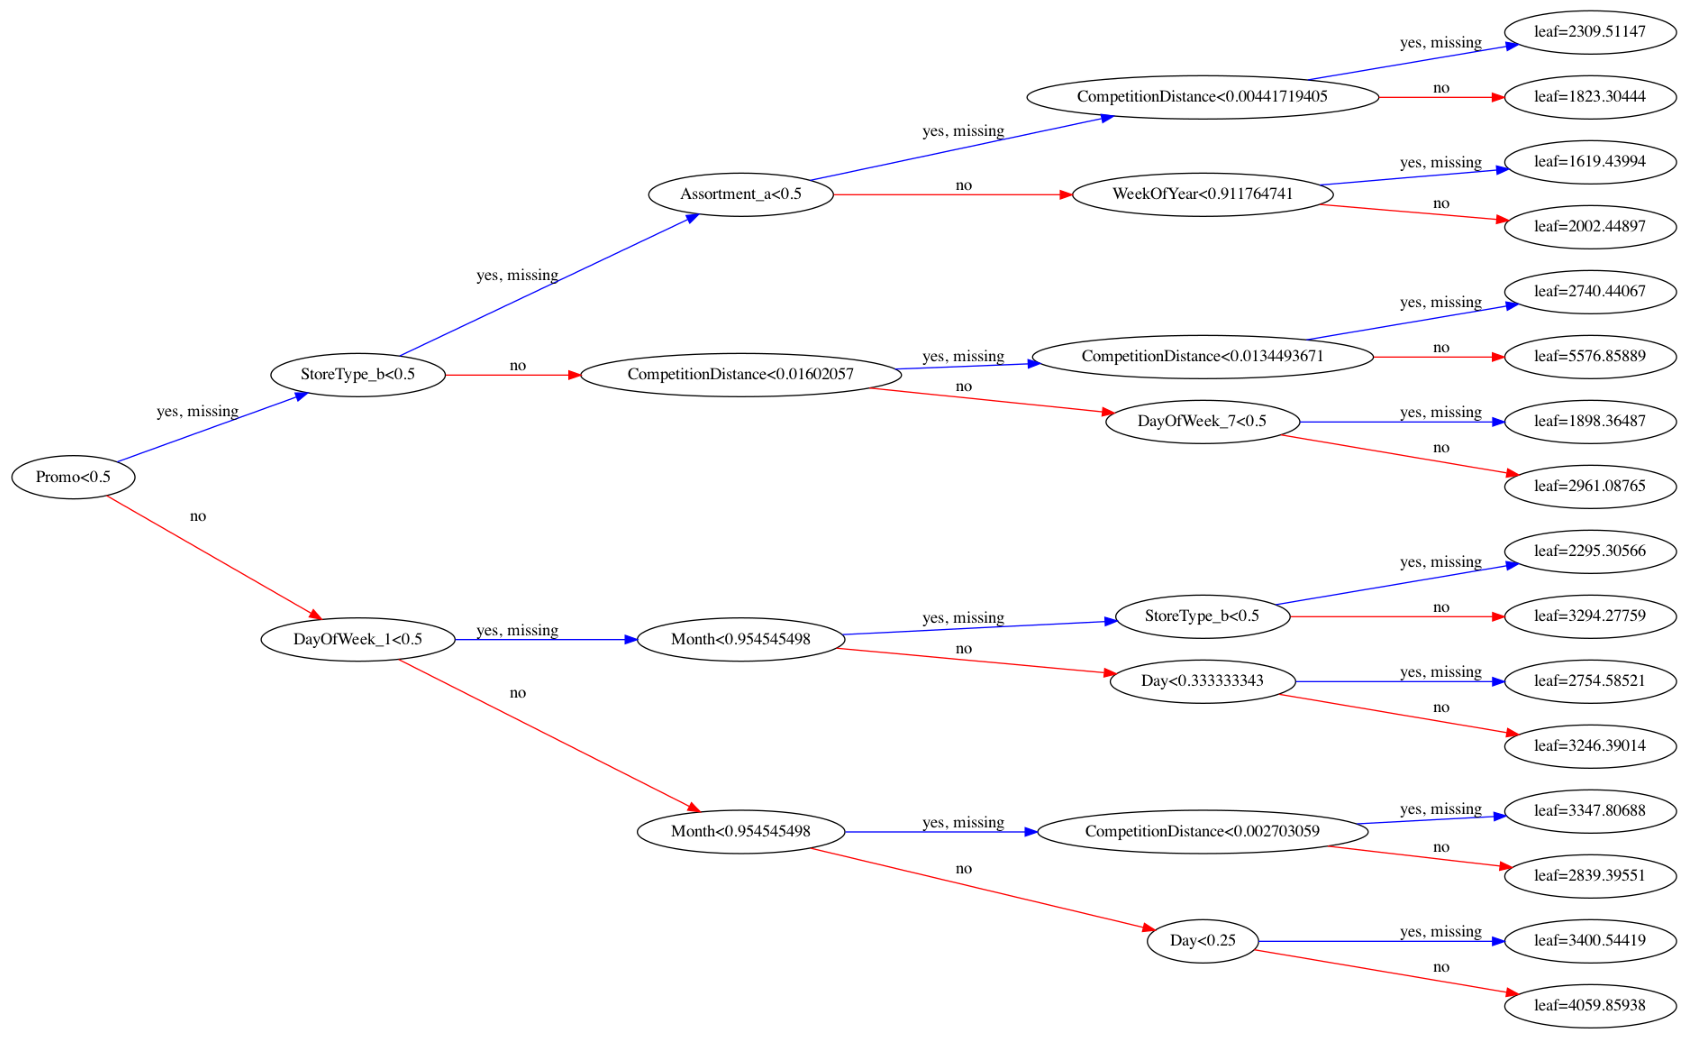

In [58]:
plot_tree(model, rankdir='LR')

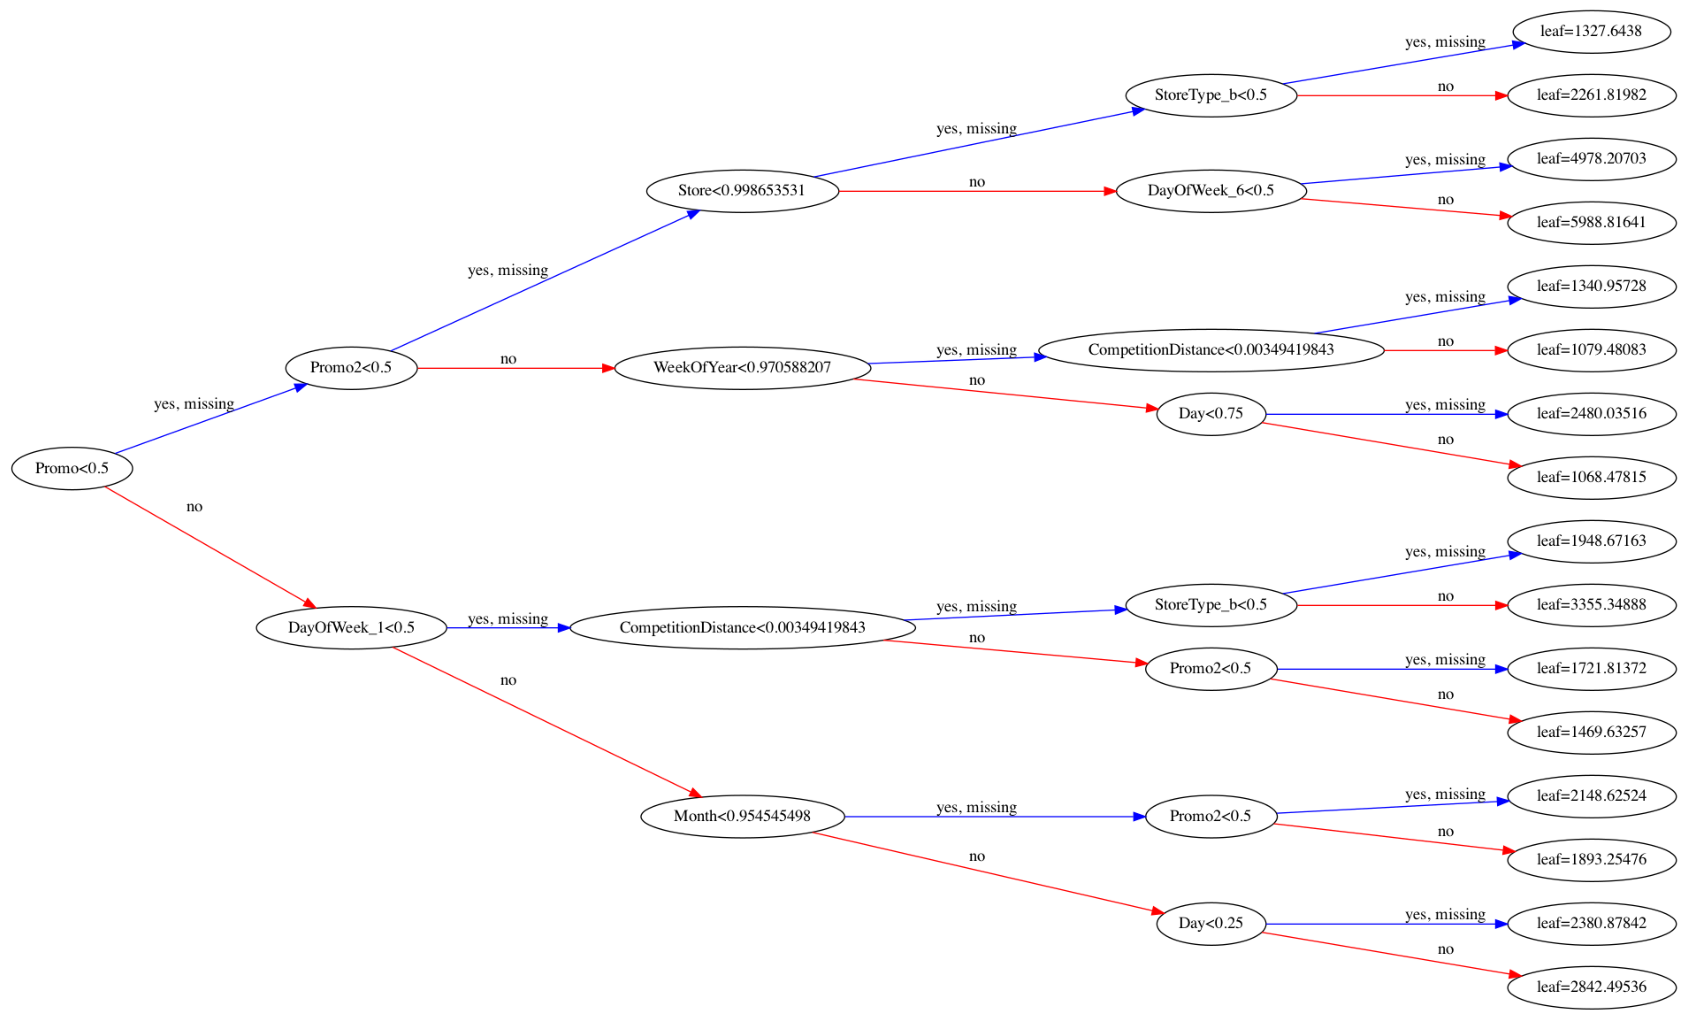

In [59]:
plot_tree(model, rankdir='LR', num_trees=1)

CPU times: user 590 ms, sys: 107 ms, total: 697 ms
Wall time: 1.51 s


<AxesSubplot:>

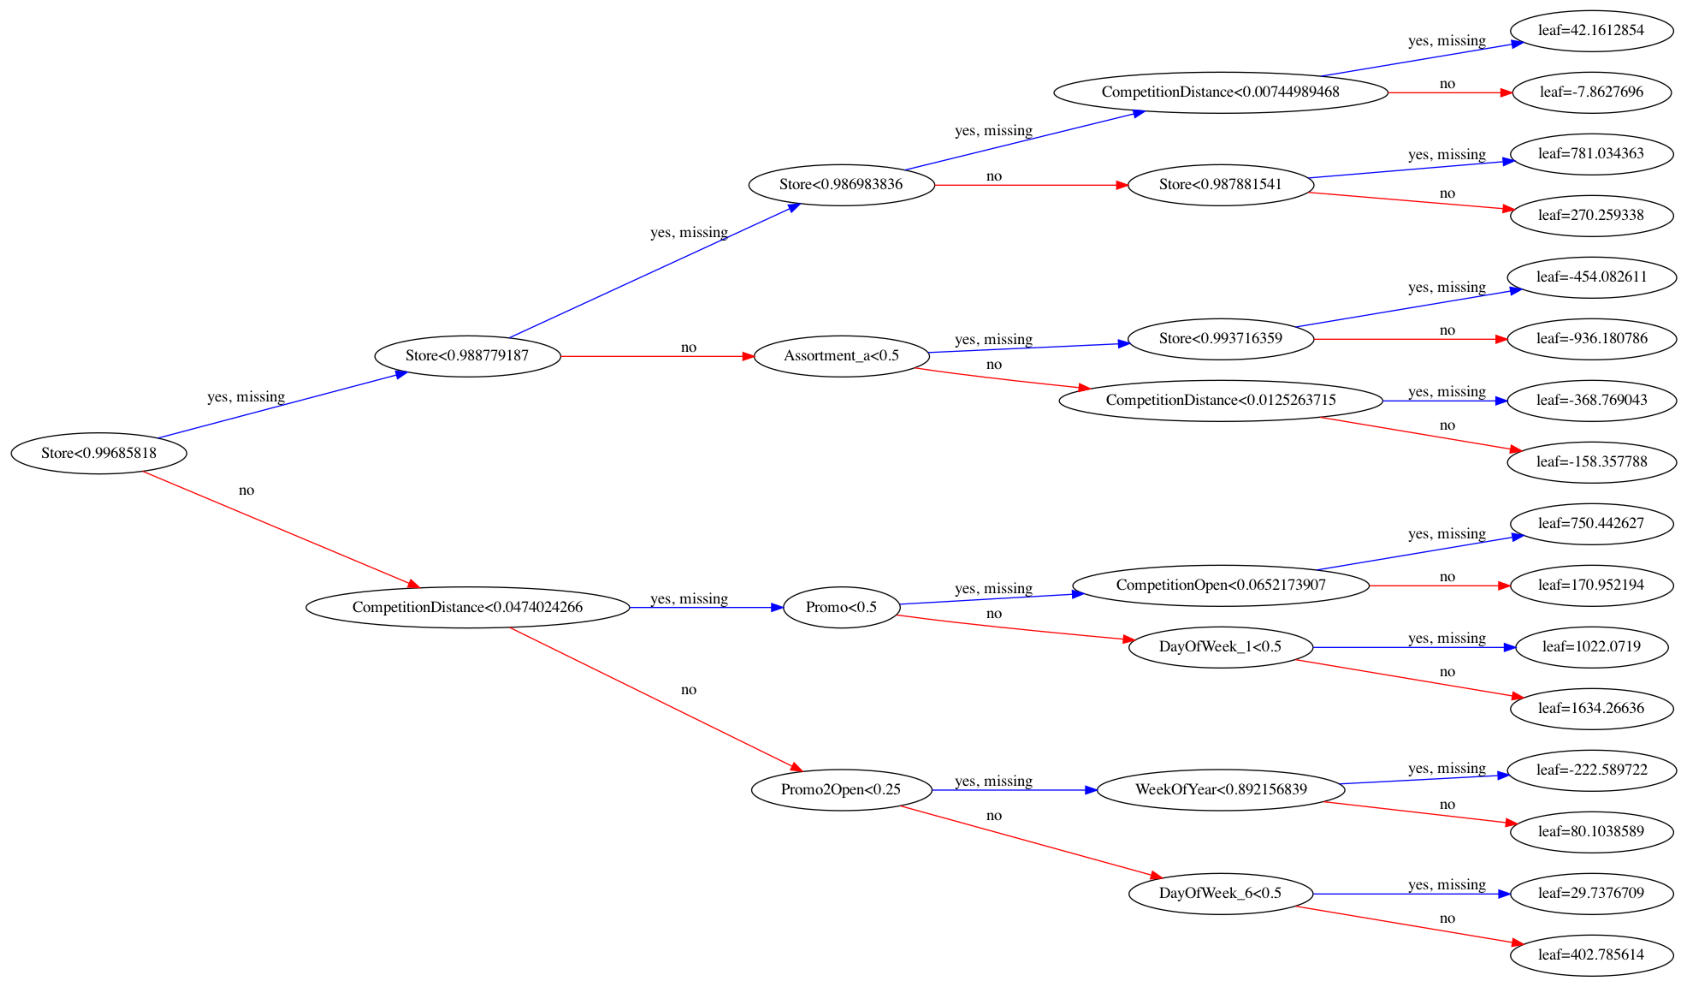

In [60]:
%%time
plot_tree(model, rankdir='LR', num_trees=19)

####  visualize the tree as text

In [61]:
trees = model.get_booster().get_dump()

In [62]:
len(trees)

20

In [63]:
print(trees[0])

0:[Promo<0.5] yes=1,no=2,missing=1
	1:[StoreType_b<0.5] yes=3,no=4,missing=3
		3:[Assortment_a<0.5] yes=7,no=8,missing=7
			7:[CompetitionDistance<0.00441719405] yes=15,no=16,missing=15
				15:leaf=2309.51147
				16:leaf=1823.30444
			8:[WeekOfYear<0.911764741] yes=17,no=18,missing=17
				17:leaf=1619.43994
				18:leaf=2002.44897
		4:[CompetitionDistance<0.01602057] yes=9,no=10,missing=9
			9:[CompetitionDistance<0.0134493671] yes=19,no=20,missing=19
				19:leaf=2740.44067
				20:leaf=5576.85889
			10:[DayOfWeek_7<0.5] yes=21,no=22,missing=21
				21:leaf=1898.36487
				22:leaf=2961.08765
	2:[DayOfWeek_1<0.5] yes=5,no=6,missing=5
		5:[Month<0.954545498] yes=11,no=12,missing=11
			11:[StoreType_b<0.5] yes=23,no=24,missing=23
				23:leaf=2295.30566
				24:leaf=3294.27759
			12:[Day<0.333333343] yes=25,no=26,missing=25
				25:leaf=2754.58521
				26:leaf=3246.39014
		6:[Month<0.954545498] yes=13,no=14,missing=13
			13:[CompetitionDistance<0.002703059] yes=27,no=28,missing=27
				27:leaf=334

## Feature importance

In [64]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

Promo:表示商店当天是否正在运行促销;
Promo2:是一些商店的持续和连续促销,不一定是当天

In [65]:
importance_df

feature  importance
1                 Promo    0.296902
12          DayOfWeek_1    0.120990
24          StoreType_b    0.075262
5                Promo2    0.046808
3   CompetitionDistance    0.042822
0                 Store    0.040012
27         Assortment_a    0.039868
29         Assortment_c    0.037673
9                 Month    0.034859
2         SchoolHoliday    0.033728
26          StoreType_d    0.032027
8                   Day    0.030945
23          StoreType_a    0.030114
11           WeekOfYear    0.025013
6            Promo2Open    0.020522
16          DayOfWeek_5    0.019161
28         Assortment_b    0.015886
18          DayOfWeek_7    0.013452
10                 Year    0.011700
13          DayOfWeek_2    0.008834
4       CompetitionOpen    0.007088
14          DayOfWeek_3    0.005368
25          StoreType_c    0.004402
17          DayOfWeek_6    0.003688
7         NewPromoMonth    0.002877
19       StateHoliday_0    0.000000
22       StateHoliday_c    0.000000
21       StateHoliday_b    0.000000
20       StateHoliday_a    0.000000
15          DayOfWeek_4    0.000000

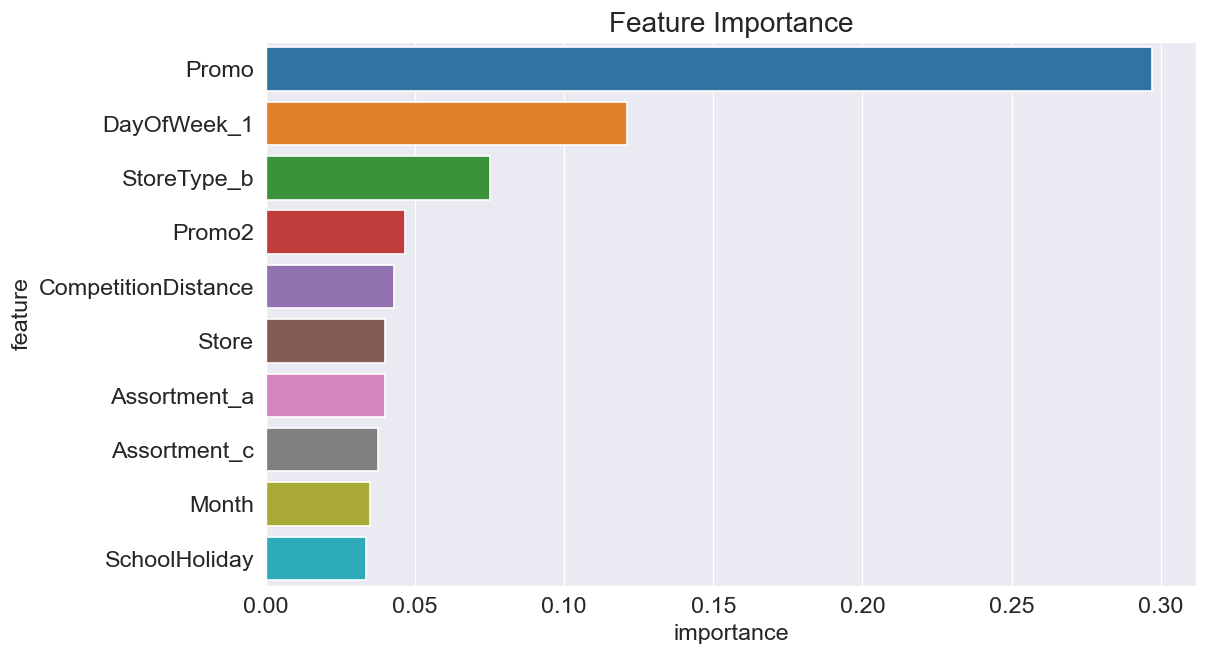

In [71]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.show()

## KFold

In [72]:
from sklearn.model_selection import KFold

In [73]:
kfold = KFold(n_splits=5)

#### 设置一个rmse的辅助函数

In [74]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    
    return model, train_rmse, val_rmse

In [75]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 2376.833396286552, Validation RMSE: 2430.0230175974825
Train RMSE: 2392.3721478263587, Validation RMSE: 2423.960217475643
Train RMSE: 2366.9934087900388, Validation RMSE: 2345.170225985502
Train RMSE: 2361.878843123434, Validation RMSE: 2454.6516901309014
Train RMSE: 2373.069047409195, Validation RMSE: 2418.0033463419477


#### 定义一个函数来平均来自 5 个不同模型的预测

In [76]:
## kfold = KFold(n_splits=5)

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [77]:
preds = predict_avg(models, X)
preds

array([8170.993 , 7694.931 , 8436.038 , ..., 7907.7305, 8046.417 ,
       9429.879 ], dtype=float32)

## Hyperparameter Tuning and Regularization


In [79]:
from sklearn.model_selection import train_test_split

#### 测试超参数的辅助函数，包括KFold

In [78]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    
    kfold = KFold(n_splits)
    
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

In [80]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [ ]:
test_params_kfold(5,n_estimators=10)

#### 只调参数：

In [82]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

### n_estimators
要创建的树的数量。更多的树 = 更大的模型容量。

In [85]:
%%time
test_params(n_estimators=100)

Train RMSE: 1217.5394837451017, Validation RMSE: 1249.846020640535
CPU times: user 6min 39s, sys: 1.86 s, total: 6min 41s
Wall time: 1min 51s


In [86]:
%%time
test_params(n_estimators=200)

Train RMSE: 952.6212022760507, Validation RMSE: 991.6781839878379
CPU times: user 13min 42s, sys: 5.67 s, total: 13min 48s
Wall time: 4min 22s


### max_depth

In [87]:
test_params(max_depth=2)

Train RMSE: 2357.4245276954425, Validation RMSE: 2376.59692939844


In [89]:
%%time
test_params(max_depth=10)

Train RMSE: 687.2769964013335, Validation RMSE: 799.2696177406023
CPU times: user 13min 50s, sys: 7.73 s, total: 13min 58s
Wall time: 5min 13s


### Ploty

In [132]:
import plotly.graph_objects as go

In [123]:
def test_max_depth(md):
    model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=50,max_depth=md)
    model.fit(X_train, train_targets)
    
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    
    return {'max_depth': md, 'Train_rmse': train_rmse, 'Val_rmse': val_rmse}

In [126]:
max_depths =pd.DataFrame([test_max_depth(md) for md in range(3,12)])

In [127]:
max_depths

max_depth   Train_rmse     Val_rmse
0          3  2294.166144  2311.850657
1          4  2076.283619  2097.797915
2          5  1829.886519  1855.029186
3          6  1647.976274  1677.741608
4          7  1321.821317  1357.308447
5          8  1174.548196  1218.643448
6          9  1017.751553  1074.429102
7         10   886.695023   964.700419
8         11   796.110856   903.287322

In [130]:
line1 = go.Scatter(x=max_depths['max_depth'],  y=max_depths['Train_rmse'], name='Training')
line2 = go.Scatter(x=max_depths['max_depth'], y=max_depths['Val_rmse'], name='Validation')

fig  = go.Figure([line1, line2])

fig.update_layout(
    title = 'Training vs. Validation RMSE',
    xaxis_title = "Max. depths(3-12)",
    yaxis_title = "Prediction RMSE",

)
fig.show()

### learning_rate

In [93]:
%%time
test_params(n_estimators=50, learning_rate=0.01)

Train RMSE: 5043.105470049795, Validation RMSE: 5052.862757490769
CPU times: user 4min 49s, sys: 3.66 s, total: 4min 53s
Wall time: 1min 40s


In [94]:
test_params(n_estimators=50, learning_rate=0.9)

Train RMSE: 1102.643422446404, Validation RMSE: 1129.3542945761342


In [95]:
%%time
test_params(n_estimators=50, learning_rate=0.99)

Train RMSE: 1137.8721443021689, Validation RMSE: 1163.3452307480372
CPU times: user 4min 32s, sys: 3.24 s, total: 4min 35s
Wall time: 1min 34s


In [133]:
def test_learning_rate(lr):
    model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=50,learning_rate=lr)
    model.fit(X_train, train_targets)
    
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    
    return {'learning_rate': lr, 'Train_rmse': train_rmse, 'Val_rmse': val_rmse}

In [153]:
%%time
learning_rates =pd.DataFrame([test_learning_rate(lr) for lr in np.arange(0.9,1,0.02)])

CPU times: user 19min 47s, sys: 16 s, total: 20min 3s
Wall time: 7min 55s


In [154]:
learning_rates

learning_rate   Train_rmse     Val_rmse
0           0.90  1102.643422  1129.354295
1           0.92  1109.783742  1139.092956
2           0.94  1100.849713  1133.082344
3           0.96  1110.096041  1139.850168
4           0.98  1127.473118  1154.857326

In [155]:
line1 = go.Scatter(x=learning_rates['learning_rate'],  y=learning_rates['Train_rmse'], name='Training')
line2 = go.Scatter(x=learning_rates['learning_rate'], y=learning_rates['Val_rmse'], name='Validation')

fig  = go.Figure([line1, line2])

fig.update_layout(
    title = 'Training vs. Validation RMSE',
    xaxis_title = "learning Rate(0.01-0.99)",
    yaxis_title = "Prediction RMSE",

)
fig.show()

booster 也可以训练线性：test_params(booster='gblinear')

## 将全部参数放在一起进行预测

In [257]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=120, 
                     learning_rate=0.66, max_depth=7, subsample=0.33, 
                     colsample_bytree=0.66)

In [258]:
%%time
model.fit(X, targets)

CPU times: user 5min 36s, sys: 4.5 s, total: 5min 40s
Wall time: 2min 23s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.66,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.66, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=120, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.33,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [259]:
test_preds = model.predict(X_test)
test_preds

array([ 4535.017 ,  7626.6406,  9290.931 , ...,  6799.0938, 24954.66  ,
        9276.291 ], dtype=float32)

#### 将预测添加到submission_df

In [260]:
submission_df['Sales']  = test_preds

In [261]:
submission_df[submission_df['Sales']==0].count()

Id       0
Sales    0
dtype: int64

In [262]:
submission_df

Id         Sales
0          1   4535.017090
1          2   7626.640625
2          3   9290.930664
3          4   6972.920410
4          5   7680.626465
...      ...           ...
41083  41084   2139.872559
41084  41085   6464.930664
41085  41086   6799.093750
41086  41087  24954.660156
41087  41088   9276.291016

[41088 rows x 2 columns]

In [236]:
submission_df['Sales'].sum()

272737540.0

In [239]:
submission_df.sample(30)

Id         Sales
5272    5273   6200.203613
11092  11093   4796.098145
5010    5011   6026.543945
3765    3766   9890.587891
591      592   9303.579102
9550    9551   7268.601562
13730  13731   6388.979004
11656  11657   7337.975098
12568  12569  16281.765625
2859    2860   7002.935059
28499  28500   3949.866455
20619  20620   7036.533691
32173  32174   5587.228027
3566    3567   2243.606201
21640  21641   7502.117676
10187  10188   3986.144043
5411    5412   8078.575684
40034  40035   4846.545898
22545  22546   6442.075684
36564  36565   5545.144531
26715  26716  13474.652344
35746  35747   7067.991699
18275  18276   4240.165039
17893  17894   6170.435547
22001  22002   5157.006348
25627  25628   7458.086914
29482  29483   8523.648438
12408  12409   6446.833008
12013  12014   4361.895996
26813  26814  13386.013672

if ['Open']=0, than ['Sales'] should be zero, also fill NAN with 1

In [242]:
test_df.Open.isna().sum()

11

In [240]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)

In [241]:
submission_df['Sales'].sum()

242650006.77597046

In [243]:
submission_df.sample(20)

Id         Sales
10358  10359   7535.010742
39640  39641      0.000000
25614  25615   5183.562012
13539  13540  11332.073242
19281  19282   8171.505371
19977  19978   6942.401855
21152  21153   4161.171387
3842    3843      0.000000
25069  25070   7343.493164
28957  28958   4724.074707
12776  12777   7509.301270
6981    6982   4829.482910
34594  34595   5950.919434
19366  19367   4930.978516
30386  30387   5568.955078
5070    5071   3977.657471
28469  28470   5544.034668
29740  29741   6376.841797
29329  29330   6365.267578
26382  26383  11753.381836

In [173]:
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay,classification_report

In [244]:
model.score(X_val, val_targets)

0.8799670554168765

Accuracy score is only for classification problems. For regression problems you can use: R2 Score, MSE (Mean Squared Error), RMSE (Root Mean Squared Error).

In [245]:
submission_df.to_csv('submission.csv', index=None)

In [246]:
from IPython.display import FileLink

In [247]:
FileLink('submission.csv')

/Users/zll/Library/Mobile Documents/com~apple~CloudDocs/Python Data Science/Kaggle/Gradient Boosting Machines/submission.csv

## use GridSearchCV find the best params, but takes long time

In [251]:
from sklearn.model_selection import GridSearchCV

In [253]:
# # 设置GridSearchCV 
# xgb = XGBRegressor(n_jobs = -1, random_state = 42) 
# params = { 
#     'n_estimators': [10, 99, 150], 
#     'max_depth': [2, 4, 8, 10, 12, None] ,
#     'learning_rate': [ 0.01,0.33,0.9, 0.99] 
# } 
# cv = GridSearchCV(xgb, params, cv = 5, n_jobs = -1)
# # 将 GridSearchCV 拟合到训练集
# cv.fit(X, targets)
# # 最佳参数
# cv.best_params_

In [256]:
%%time
# 设置GridSearchCV 
xgb = XGBRegressor(n_jobs = -1, random_state = 42) 
params = { 
    'n_estimators': [40,  120], 
    'max_depth': [ 4, 6, None] ,
    'learning_rate': [0.33,0.66, 0.99] 
} 
cv = GridSearchCV(xgb, params, cv = 5, n_jobs = -1)
# 将 GridSearchCV 拟合到训练集
cv.fit(X, targets)
# 最佳参数
cv.best_params_

CPU times: user 11min 39s, sys: 9.45 s, total: 11min 49s
Wall time: 2h 30min 57s


{'learning_rate': 0.66, 'max_depth': 6, 'n_estimators': 120}